In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [49]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [50]:
### Your code is here

print(data.shape)
data.corr()

(10000, 11)


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.081323,0.030638,-0.261456,0.081564,-0.576066,0.000030,0.113888
Driving_License,-0.081323,1.000000,0.004926,0.020464,-0.014338,0.044335,0.002704,0.011263
Region_Code,0.030638,0.004926,1.000000,-0.021270,-0.012213,-0.039733,-0.008527,0.010230
Previously_Insured,-0.261456,0.020464,-0.021270,1.000000,-0.005164,0.224719,0.022350,-0.333502
Annual_Premium,0.081564,-0.014338,-0.012213,-0.005164,1.000000,-0.123851,-0.008878,0.029839
Policy_Sales_Channel,-0.576066,0.044335,-0.039733,0.224719,-0.123851,1.000000,-0.006131,-0.146421
Vintage,0.000030,0.002704,-0.008527,0.022350,-0.008878,-0.006131,1.000000,-0.007187
Response,0.113888,0.011263,0.010230,-0.333502,0.029839,-0.146421,-0.007187,1.000000


In [51]:
data.describe(include=object)

,Gender,Vehicle_Age,Vehicle_Damage
count,10000,10000,10000
unique,2,3,2
top,Male,1-2 Year,Yes
freq,5437,5263,5143


In [5]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [52]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [7]:
# from category_encoders.one_hot import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# ### Закодируйте признаки типа `object` с помощью `one-hot` кодирования.
# categorical_columns = list(data.select_dtypes(include=object).columns)
# # выделим индексы этих колонок
# cols_for_ohe_idx = [list(data.columns).index(idx) for idx in categorical_columns]
# c = [('OneHotEncoder'), OneHotEncoder(), cols_for_ohe_idx]
# col_transform = ColumnTransformer(transformers=c)

In [53]:
# выделим категориальные колонки
categorical_columns = list(data.select_dtypes(include=object).columns)

# применим OneHotEncoding для категориальных колонок
for col in categorical_columns:
    one_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat((data.drop(col, axis=1), one_hot), axis=1)

In [54]:
data.dtypes

Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
Gender_Male                uint8
Vehicle_Age_< 1 Year       uint8
Vehicle_Age_> 2 Years      uint8
Vehicle_Damage_Yes         uint8
dtype: object

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [11]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import GradientBoostingClassifier

# ### Your code is here
# pipe_gb = ([('column_transformer', 
#             col_transform),

#             ('GB', 
#             GradientBoostingClassifier(learning_rate = 1, random_state = 1, n_estimators = 100))
            
#             ])

# pipe_gb

In [12]:
### Обучите градиентный бустинг из sklearn
from sklearn.ensemble import GradientBoostingClassifier

model  = GradientBoostingClassifier(learning_rate = 1, random_state = 1, n_estimators = 100)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=1)

In [13]:
print(classification_report(y_true=y_test, y_pred=model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.904     0.931     0.917      1770
           1      0.311     0.239     0.270       230

    accuracy                          0.852      2000
   macro avg      0.607     0.585     0.594      2000
weighted avg      0.836     0.852     0.843      2000



In [14]:
### посчитайте AUC, оцените качество классификации

pr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

print(f"AUC GB {auc(pr_gb, tpr_gb):.3f}")

AUC GB 0.828


In [23]:
print(f"f1_score = {f1_score(y_true=y_test, y_pred=model.predict(X_test)):.3f}" )

f1_score = 0.270


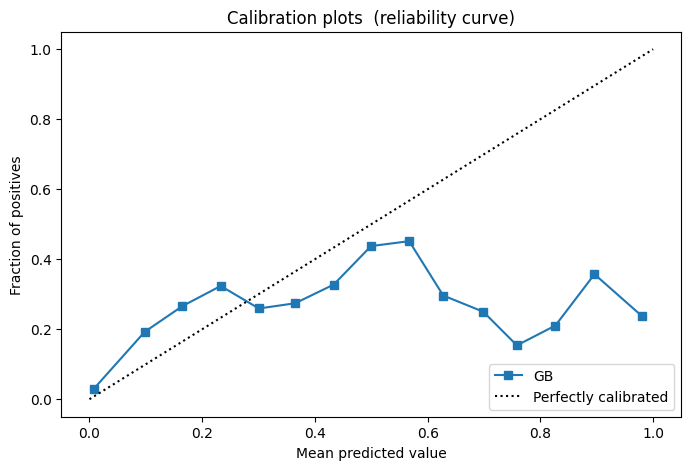

In [15]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


### Your code is here
### Предсказания модели на тесте и соответствующая калибровочная кривая
from sklearn.calibration import calibration_curve

prob_pos = model.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=15)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="GB")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')
plt.show()


**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [32]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]


In [33]:
### Your code is here
for (i, n) in enumerate(n_estimators_list):
    for (j, lr) in enumerate(learning_rate_list):
        model_2 = GradientBoostingClassifier(n_estimators=n,
                                           learning_rate=lr,
                                           max_depth=5,
                                           random_state=1)
        model_2.fit(X_train, y_train)
        print(f"f1_score = {f1_score(y_true=y_test, y_pred=model_2.predict(X_test), average='weighted'):.3f}" )


f1_score = 0.836
f1_score = 0.832
f1_score = 0.831
f1_score = 0.838
f1_score = 0.832
f1_score = 0.831
f1_score = 0.844
f1_score = 0.832
f1_score = 0.831
f1_score = 0.836
f1_score = 0.832
f1_score = 0.832
f1_score = 0.837
f1_score = 0.838
f1_score = 0.832
f1_score = 0.843
f1_score = 0.843
f1_score = 0.832
f1_score = 0.844
f1_score = 0.843
f1_score = 0.835
f1_score = 0.846
f1_score = 0.846
f1_score = 0.837


**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [34]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here

In [36]:
### Градиентный бустинг с максимальной глубиной деревьев 5

for (i, n) in enumerate(n_estimators_list):
        model_3 = GradientBoostingClassifier(n_estimators=n,
                                           max_depth=5,
                                           random_state=1)
        model_3.fit(X_train, y_train)
        print(f"n_estimators = {n} f1_score = {f1_score(y_true=y_test, y_pred=model_3.predict(X_test), average='weighted'):.3f}" )


n_estimators = 2 f1_score = 0.831
n_estimators = 3 f1_score = 0.831
n_estimators = 4 f1_score = 0.832
n_estimators = 5 f1_score = 0.832
n_estimators = 10 f1_score = 0.832
n_estimators = 20 f1_score = 0.832
n_estimators = 50 f1_score = 0.832
n_estimators = 70 f1_score = 0.834
n_estimators = 100 f1_score = 0.838
n_estimators = 200 f1_score = 0.843
n_estimators = 700 f1_score = 0.843
n_estimators = 1000 f1_score = 0.846
n_estimators = 2000 f1_score = 0.837


In [37]:
### Градиентный бустинг с максимальной глубиной деревьев 5000

for (i, n) in enumerate(n_estimators_list):
        model_4 = GradientBoostingClassifier(n_estimators=n,
                                           max_depth=5000,
                                           random_state=1)
        model_4.fit(X_train, y_train)
        print(f"n_estimators = {n} f1_score = {f1_score(y_true=y_test, y_pred=model_4.predict(X_test), average='weighted'):.3f}" )

n_estimators = 2 f1_score = 0.831
n_estimators = 3 f1_score = 0.831
n_estimators = 4 f1_score = 0.831
n_estimators = 5 f1_score = 0.835
n_estimators = 10 f1_score = 0.834
n_estimators = 20 f1_score = 0.835
n_estimators = 50 f1_score = 0.832
n_estimators = 70 f1_score = 0.831
n_estimators = 100 f1_score = 0.833
n_estimators = 200 f1_score = 0.834
n_estimators = 700 f1_score = 0.834
n_estimators = 1000 f1_score = 0.834
n_estimators = 2000 f1_score = 0.834


In [38]:
#### Случайный лес с максимальной глубиной деревьев 5
for (i, n) in enumerate(n_estimators_list):
    model_rf_1 = RandomForestClassifier(n_estimators=n, 
                                    max_depth=5,
                                    random_state=1
                                   )
    model_rf_1.fit(X_train, y_train)
    print(f"{i} n_estimators = {n} f1_score = {f1_score(y_true=y_test, y_pred=model_rf_1.predict(X_test), average='weighted'):.3f}" )

0 n_estimators = 2 f1_score = 0.834
1 n_estimators = 3 f1_score = 0.833
2 n_estimators = 4 f1_score = 0.831
3 n_estimators = 5 f1_score = 0.833
4 n_estimators = 10 f1_score = 0.831
5 n_estimators = 20 f1_score = 0.831
6 n_estimators = 50 f1_score = 0.831
7 n_estimators = 70 f1_score = 0.831
8 n_estimators = 100 f1_score = 0.831
9 n_estimators = 200 f1_score = 0.831
10 n_estimators = 700 f1_score = 0.831
11 n_estimators = 1000 f1_score = 0.831
12 n_estimators = 2000 f1_score = 0.831


In [39]:
#### Случайный лес с максимальной глубиной деревьев 5000
for (i, n) in enumerate(n_estimators_list):
    model_rf_2 = RandomForestClassifier(n_estimators=n, 
                                    max_depth=5000,
                                    random_state=1
                                   )
    model_rf_2.fit(X_train, y_train)
    print(f"{i} n_estimators = {n} f1_score = {f1_score(y_true=y_test, y_pred=model_rf_2.predict(X_test), average='weighted'):.3f}" )

0 n_estimators = 2 f1_score = 0.847
1 n_estimators = 3 f1_score = 0.842
2 n_estimators = 4 f1_score = 0.841
3 n_estimators = 5 f1_score = 0.839
4 n_estimators = 10 f1_score = 0.842
5 n_estimators = 20 f1_score = 0.848
6 n_estimators = 50 f1_score = 0.845
7 n_estimators = 70 f1_score = 0.839
8 n_estimators = 100 f1_score = 0.838
9 n_estimators = 200 f1_score = 0.838
10 n_estimators = 700 f1_score = 0.839
11 n_estimators = 1000 f1_score = 0.839
12 n_estimators = 2000 f1_score = 0.840


**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [6]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
from catboost import CatBoostClassifier

### Your code is here
data_2 = pd.read_csv('vehicle_insurance.csv')
data_2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
# заново считаем данные и произведем разбивку

from sklearn.model_selection import train_test_split
X_2 = data_2.drop('Response', axis=1)
y_2 = data_2['Response']

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_2, y_2,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [13]:
categorical_columns_2 = list(data_2.select_dtypes(include=object).columns)
categorical_columns_2

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [16]:
catboost = CatBoostClassifier(verbose=0)

catboost.fit(X_train_, y_train_, cat_features=categorical_columns_2)

In [17]:
train_preds = catboost.predict(X_train_)
test_preds = catboost.predict(X_test_)

train_error = np.mean((train_preds - y_train_.values.ravel())**2)
test_error = np.mean((test_preds - y_test_.values.ravel())**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

Качество на трейне: 0.096
Качество на тесте: 0.12


In [24]:
# важность фичей
c = catboost.feature_importances_

In [46]:
# создадим словарик из ключ - столбец, значение  - feature_importances важность фичей
res = {}
for i in range(len(list(X_test_.columns))):
    res[X_test_.columns[i]] = round(c[i],3)
# отсортируем словарик по значению x[1], возьмем первые 3 элемента, сделаем reverse
sorted(res.items(), key=lambda x:x[1], reverse=True)[:3]

[('Previously_Insured', 27.359), ('Vehicle_Damage', 21.368), ('Age', 11.367)]

In [47]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:01:010m

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip


**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

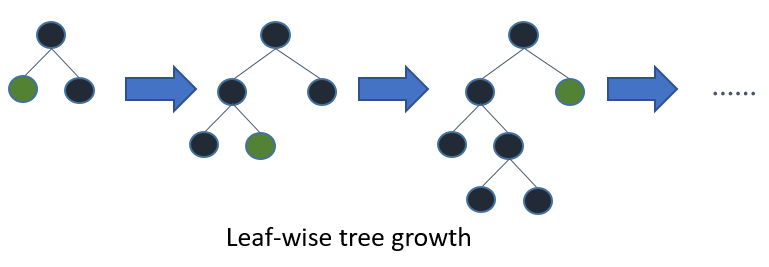

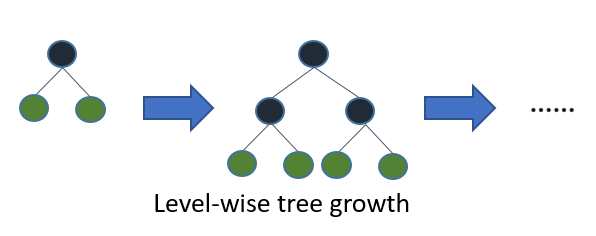

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [56]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here

model_lgbm = LGBMClassifier()

search = GridSearchCV(model_lgbm, 
                      param_grid=params
                     )
search.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]})

In [57]:
print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.87288):
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}


In [61]:
print(classification_report(y_true=y_test, y_pred=search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.885     1.000     0.939      1770
           1      0.000     0.000     0.000       230

    accuracy                          0.885      2000
   macro avg      0.443     0.500     0.469      2000
weighted avg      0.783     0.885     0.831      2000

